In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('F:\emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [8]:
X.shape

(5172, 3000)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [11]:
mnb_model=MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [12]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1101
           1       0.97      0.94      0.95       451

    accuracy                           0.97      1552
   macro avg       0.97      0.96      0.97      1552
weighted avg       0.97      0.97      0.97      1552



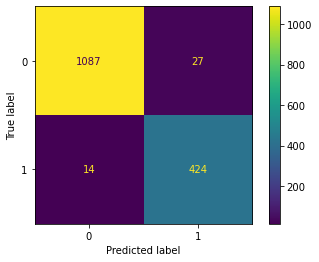

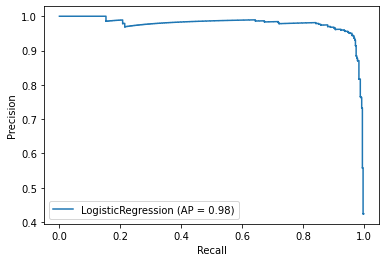

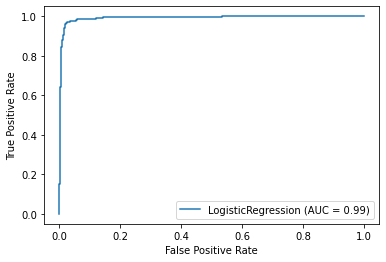

In [15]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)
print("LOGISTIC REGRESSION MODEL")
report(lr_model)

NAIVE BAYES MODEL
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1075
           1       0.95      0.87      0.91       477

    accuracy                           0.95      1552
   macro avg       0.95      0.92      0.93      1552
weighted avg       0.95      0.95      0.94      1552



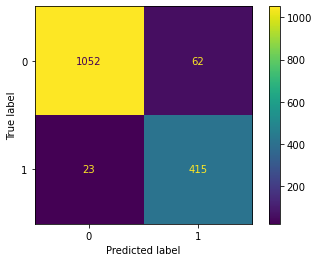

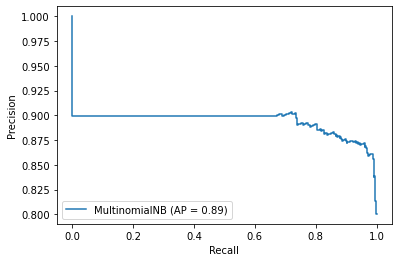

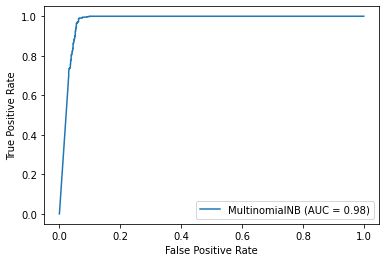

In [16]:
print("NAIVE BAYES MODEL")
report(mnb_model)

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1118
           1       0.95      0.96      0.96       434

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



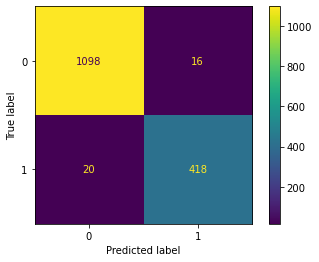

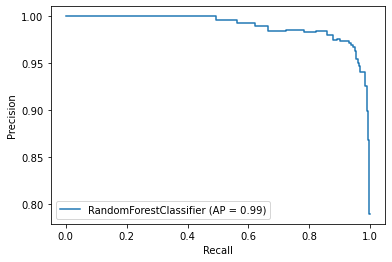

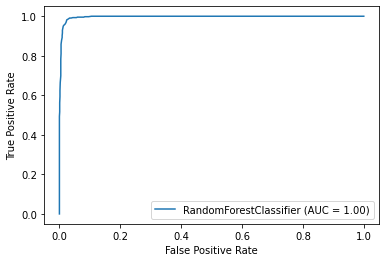

In [17]:
print("RANDOM FOREST MODEL")
report(rfc_model)

#From the above, we can see that Random Forest Classifier performed better amongst the three models considered and can be used for the classification task.